# Naive bayes

- De forma general por  el principio de [inclusion-exclusión](https://es.wikipedia.org/wiki/Principio_de_inclusi%C3%B3n-exclusi%C3%B3n) tenemos que:
    $$ p(A \cap B) = p(A) \cdot p(B|A) = p(A) + p(B) - p(A \cup B)$$

- Naive Bayes asume la independencia de eventos

### Formulación
- Supongamos que deseamos clasificar el vector(o caracterísica) $X = (x_{1},x_{2},\cdots,x_{n})$ en alguna de las $m$ clases $C_{1},C_{2},\cdots,C_{m}$ lo que buscamos es calcular la probabilidad de que $X$ pertenezca a alguna de las clases dadas, asi podemos asignar a $X$ la etiqueta de la clase con mayor probabilidad. 

- [Bayes-theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem)
$$p(C_{i}|X)=\frac{p(C_{i})\cdot p(X|C_{i})}{p(X)}$$

- $p(C_{i})$ es la probabilidad a priori de la clase dada sin ninguna evidencia especifica.
- $p(X)$ es la probabilidad de observar el vector(caracteristicas) dado sobre todo el conjunto de vectores(caracteristicas).

$$C(X) = arg max _{i=1,\cdots,m}  \frac{p(C_{i}) \cdot p(X|C_{i})}{p(X)} = argmax_{i=1,\cdots,m}p(C_{i})\cdot p(X|C_{i})$$

- $p(X|C_{i})$ es la probabilidad de ver el vector de entrada $X$ dado que ya conocemos que la clase de el item es $C_{i}$

- Suponiendo que vivimos en un mundo donde todo es independiente
$$p(X|C_{i}) = \prod_{j=1}^{n} p(x_{j}|C_{i})$$

- Como calculamos $p(x_{j}|C_{i})$, la probabilidad de observar $x_{j}$ dada la etiqueta de la clase $i$?
    - Si la variable es categórica, podemos simplemente seleccionar todas las instancias de la clase $i$ en el conjunto de entrenamiento y computar la fracción de estos que tienen la propiedad $x_{j}$
    - Cuando $x_{j}$ es una variable numérica se requiere de mas imaginación pero en principio es calculada por cuan regular es este valor observado en el conjunto de datos de entrenamiento.

# Gaussian Naive Bayes
- Se basa en el supuesto de que los datos de cada etiqueta son obtenidos de una [función Gausiana](https://es.wikipedia.org/wiki/Funci%C3%B3n_gaussiana) simple
- El likelihood de las caracteristicas su supone que es Gaussiano:
$$p(x_{i}|y) = \frac{1}{\sqrt{2\pi \sigma_{y}^{2}}} \exp (-\frac{(x_{i}-\mu_{y})^2}{2\sigma_{y}^{2}})$$

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import naive_bayes 
from sklearn import model_selection
from sklearn import metrics
from sklearn import feature_extraction
from sklearn import pipeline

In [99]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [100]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(iris.data,iris.target,test_size=.2)

In [101]:
gnb = naive_bayes.GaussianNB()
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

In [102]:
model = gnb.fit(X_train, y_train)
model

GaussianNB(priors=None, var_smoothing=1e-09)

In [150]:
?naive_bayes.GaussianNB

Init signature: naive_bayes.GaussianNB(priors=None, var_smoothing=1e-09)
Docstring:     
Gaussian Naive Bayes (GaussianNB)

Can perform online updates to model parameters via `partial_fit` method.
For details on algorithm used to update feature means and variance online,
see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:

    http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf

Read more in the :ref:`User Guide <gaussian_naive_bayes>`.

Parameters
----------
priors : array-like, shape (n_classes,)
    Prior probabilities of the classes. If specified the priors are not
    adjusted according to the data.

var_smoothing : float, optional (default=1e-9)
    Portion of the largest variance of all features that is added to
    variances for calculation stability.

Attributes
----------
class_prior_ : array, shape (n_classes,)
    probability of each class.

class_count_ : array, shape (n_classes,)
    number of training samples observed in each class.



In [103]:
y_pred = gnb.predict(X_test)
y_pred

array([2, 1, 0, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0,
       1, 0, 1, 2, 1, 1, 2, 1])

In [104]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 10]])

In [105]:
X_test.shape

(30, 4)

In [106]:
x_pred = gnb.predict(X_train)
x_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2,
       0, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0,
       0, 1, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1,
       1, 0, 2, 0, 1, 1, 0, 2, 2, 1])

In [107]:
metrics.confusion_matrix(y_train, x_pred)

array([[41,  0,  0],
       [ 0, 38,  1],
       [ 0,  3, 37]])

In [108]:
X_train.shape

(120, 4)

In [109]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.91      0.95        11
           2       0.91      1.00      0.95        10

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [110]:
print(metrics.classification_report(y_train,x_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.93      0.97      0.95        39
           2       0.97      0.93      0.95        40

   micro avg       0.97      0.97      0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [111]:
?metrics.classification_report

Signature:
metrics.classification_report(
    y_true,
    y_pred,
    labels=None,
    target_names=None,
    sample_weight=None,
    digits=2,
    output_dict=False,
)
Docstring:
Build a text report showing the main classification metrics

Read more in the :ref:`User Guide <classification_report>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) target values.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Estimated targets as returned by a classifier.

labels : array, shape = [n_labels]
    Optional list of label indices to include in the report.

target_names : list of strings
    Optional display names matching the labels (same order).

sample_weight : array-like of shape = [n_samples], optional
    Sample weights.

digits : int
    Number of digits for formatting output floating point values.
    When ``output_dict`` is ``True``, this will be ignored and the
    returned values will not be ro

In [112]:
y_proba = gnb.predict_log_proba(X_test)
print(y_proba)
print(len(y_proba))

[[-4.22503737e+02 -4.43437766e+00 -1.19333663e-02]
 [-1.75284573e+02 -8.00708464e-06 -1.17351878e+01]
 [ 0.00000000e+00 -5.06074811e+01 -5.49078278e+01]
 [-1.84155415e+02 -2.50287103e-05 -1.05954995e+01]
 [-9.69541723e+01 -6.31777047e-07 -1.42747296e+01]
 [ 0.00000000e+00 -5.65157446e+01 -5.88220020e+01]
 [-4.50623464e+02 -7.18541122e-01 -6.68382154e-01]
 [ 0.00000000e+00 -5.19711742e+01 -5.66493942e+01]
 [-7.17148536e+02 -2.46798065e+01 -1.91295868e-11]
 [-2.08960651e+02 -1.19674987e-04 -9.03079077e+00]
 [-3.59130827e+02 -2.16519457e+00 -1.21859896e-01]
 [ 0.00000000e+00 -5.24448599e+01 -5.58833748e+01]
 [ 0.00000000e+00 -5.20644200e+01 -5.68688946e+01]
 [-2.90146985e+02 -1.09866090e-01 -2.26292317e+00]
 [-5.41256371e+02 -1.89248795e+01 -6.03989303e-09]
 [-4.20646207e+02 -5.48489453e+00 -4.15760350e-03]
 [ 0.00000000e+00 -3.54916678e+01 -4.26675726e+01]
 [-5.65299361e+02 -1.64336616e+01 -7.29375997e-08]
 [-4.08158656e+02 -3.28469526e+00 -3.81713401e-02]
 [-5.69744744e+02 -1.63455356e+

# Multinomial Naive Bayes
- Se basa en el supuesto de que las caracteristicas generadas son de una [distribución multinomial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_multinomial) simple 

In [176]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [177]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics','sci.electronics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [178]:
print(train.data[5])

From: mdw33310@uxa.cso.uiuc.edu (Michael D. Walker)
Subject: Re: Question about Virgin Mary
Organization: University of Illinois at Urbana
Lines: 19


	Two follow up's to Mark's last posting:

	1.  As far as current investigations, the Church recently declared the
	    crying statue and corresponding messages from Mary at Akita,
	    Japan as approved (I found this out about a month ago.)

	2.  Again in the proof department, start with the appearances of Mary
	    at Fatima.  Among other things, there were pictures taken of the
	    "miracle of the sun" that appeared in some major American newspaper
	    (The New York Times, I believe) as well as most of the major
	    European newspapers.  

	    I could talk (or post) for hours on this topic, but... 
		(I have a thesis to write).
						God Bless,
							- Mike Walker
							 
P.S.  Anyone want info, I have more.  mdw33310@uxa.cso.uiuc.edu



In [179]:
model = pipeline.make_pipeline(feature_extraction.text.TfidfVectorizer(), naive_bayes.MultinomialNB())

In [180]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [181]:
labels

array([1, 2, 3, ..., 3, 3, 3])

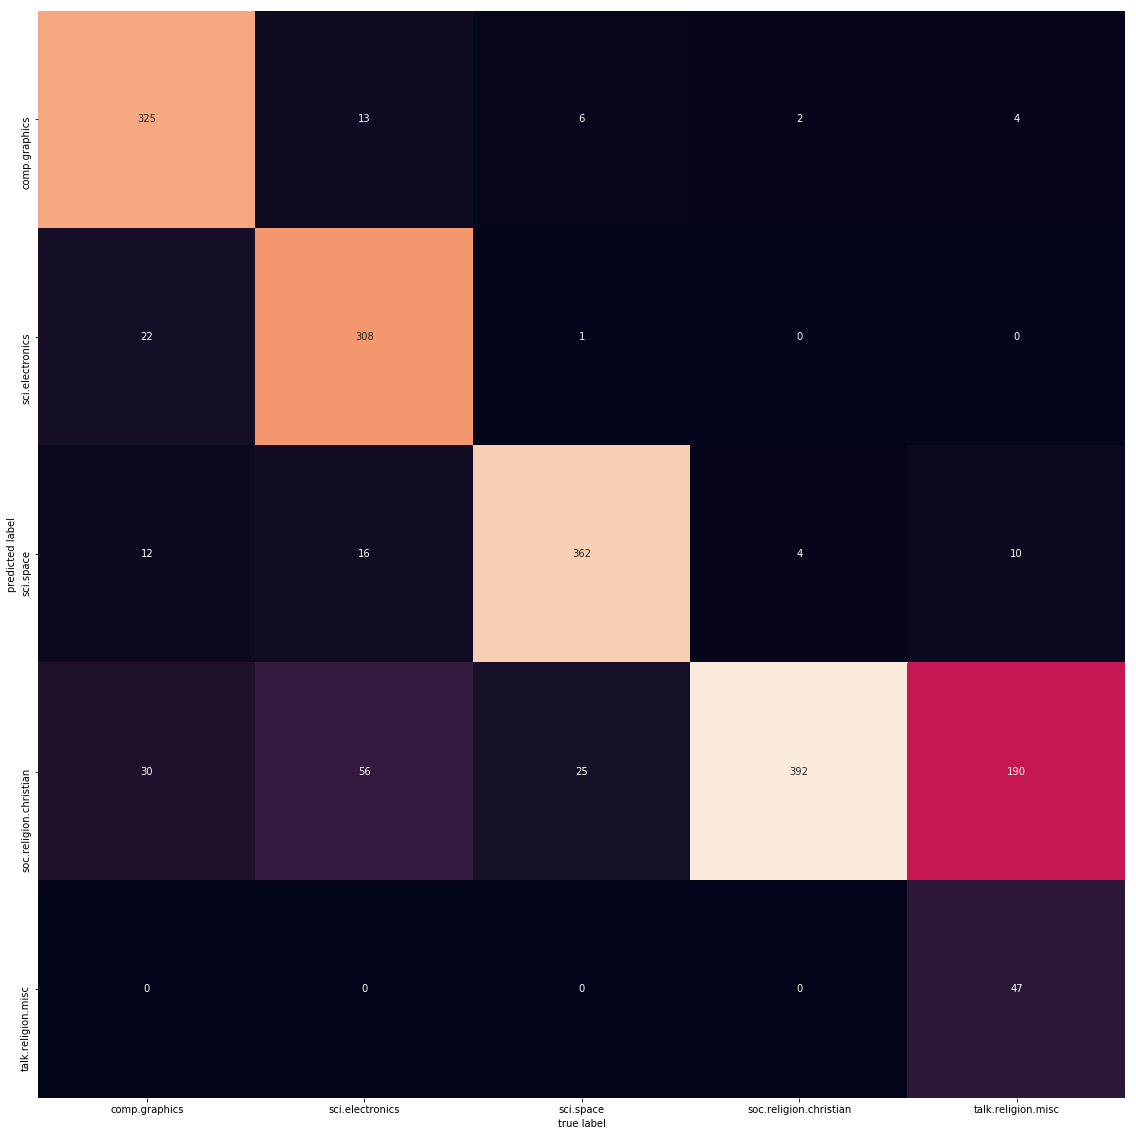

In [182]:
mat = metrics.confusion_matrix(test.target, labels)
plt.figure(figsize=(30,20))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [184]:
df_medicina = pd.read_csv("Kaggle/mexican_medical_students_mental_health_data.csv")

In [185]:
df_medicina.replace({'gender' : "f"}, 0, inplace=True)

In [186]:
df_medicina.replace({'gender' : "m"}, 1, inplace=True)

In [187]:
medicina = df_medicina[['height','weight','age','gender']].dropna()
medicina.head()

,height,weight,age,gender
0,1.50,75.0,19.0,1.0
1,1.68,56.0,18.0,1.0
2,1.74,76.0,19.0,1.0
3,1.68,67.0,18.0,0.0
4,1.80,83.0,18.0,1.0


In [188]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(medicina[['height','weight']],medicina['gender'],test_size=.2)

In [189]:
gnb = naive_bayes.GaussianNB()
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

In [190]:
model = gnb.fit(X_train, y_train)
model

GaussianNB(priors=None, var_smoothing=1e-09)

In [191]:
y_pred = gnb.predict(X_test)
y_pred

array([0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0.])

In [192]:
metrics.confusion_matrix(y_test, y_pred)

array([[68, 13],
       [18, 55]])

In [193]:
x_pred = gnb.predict(X_train)
x_pred

array([1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1.

In [194]:
metrics.confusion_matrix(y_train, x_pred)

array([[269,  45],
       [ 50, 249]])

In [195]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81        81
         1.0       0.81      0.75      0.78        73

   micro avg       0.80      0.80      0.80       154
   macro avg       0.80      0.80      0.80       154
weighted avg       0.80      0.80      0.80       154



In [196]:
print(metrics.classification_report(y_train,x_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       314
         1.0       0.85      0.83      0.84       299

   micro avg       0.85      0.85      0.85       613
   macro avg       0.85      0.84      0.84       613
weighted avg       0.85      0.85      0.84       613



## Titanic

In [314]:
test = pd.read_csv("Kaggle/kaggle-titanic-master/input/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [315]:
test.replace({'Sex' : "female"}, 0, inplace=True)
test.replace({'Sex' : "male"}, 1, inplace=True)

In [316]:
train = pd.read_csv("Kaggle/kaggle-titanic-master/input/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [317]:
train.replace({'Sex' : "female"}, 0, inplace=True)
train.replace({'Sex' : "male"}, 1, inplace=True)

In [318]:
target = pd.read_csv("Kaggle/kaggle-titanic-master/input/gender_submission.csv")
target.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [351]:
testTest = test[['Pclass','Sex','Fare']].dropna()
testTest.fillna(0)
testTest.shape

(417, 3)

In [354]:
targetTest = target['Survived']
targetTest.fillna(0)
targetTest.shape

(418,)

In [355]:
testTrain = train[['Pclass','Sex','Fare','Survived']]
testTrain.fillna(0)
testTrain.shape

(891, 4)

In [356]:
targetTrain = testTrain['Survived']
targetTrain.fillna(0)
targetTrain.shape

(891,)

In [357]:
gnb = naive_bayes.GaussianNB()
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

In [358]:
model = gnb.fit(testTrain.drop(['Survived'], axis=1), targetTrain)
model

GaussianNB(priors=None, var_smoothing=1e-09)

In [359]:
y_pred = gnb.predict(testTest)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [361]:
metrics.confusion_matrix(targetTest[:-1], y_pred)

array([[183,  82],
       [ 60,  92]])

In [373]:
print(metrics.classification_report(targetTest[:-1],y_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       265
           1       0.53      0.61      0.56       152

   micro avg       0.66      0.66      0.66       417
   macro avg       0.64      0.65      0.64       417
weighted avg       0.67      0.66      0.66       417

